# ARCHIVO PARA PODER VISUALIZAR LAS TRAYECTORIAS DEL ROBOT DE 3 GRADOS DE LIBERTAD

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from main import *
from ObjetoRobot import objetosRobot,obtenerPropiedadesFisicas
from AlgoritmoGenetico.funcionesAlgoritmoGenetico import *
from AlgoritmoGenetico import objetoGenetico
from Graficar.funcionesGraficas import *
from Trayectorias.moduloTrayectoriasRobot import *


### Propiedades fisicas del robot

In [2]:
#Grados de libertad 
n = 3
#Obtener las propiedades fisicas
propiedadesFisicas = obtenerPropiedadesFisicas.obtenerPropiedadesFisicasRobots(n)

### Parámetros del algoritmo genetico

In [3]:
#NP -> Elementos de la población
NP = 10

#g -> Numero de generaciones
G = 10
#F -> Tasa de mutación
F = 0.5

#GR -> Factor de recombinación. GR se define como un cociente entre el número de individuos a recombinar
# y el número de individuos totales de la población

#Individuos a recombinar 
nr = 12

GR =  nr/NP #-> individuos a recombinar/Individuos totales de la población


### Crear objeto genetico

In [4]:
Genetico1 = objetoGenetico.Genetico(NP,G,F,nr)

### Crear objeto Robot

In [5]:
Robot1 = objetosRobot.Robot3DOF(n,propiedadesFisicas)

### Creación de las trayectorias

#### Vector de tiempos

In [6]:
#Tiempo inicial
t0 = 0

#Tiempo final
tf = 10

#Tamaño de paso
dt = 0.01

#Vector de tiempos
t = np.arange(t0,tf,dt)

#Frecuencia angular
w = 2*np.pi/tf

#### Trayectorias del robot

In [7]:
#Posicion
Q = np.array( [ np.cos(w*t),
                np.sin(w*t),
                -np.cos(w*t)] )
#Velocidad
Qd = np.array( [ -w*np.sin(w*t),
                w*np.cos(w*t) ,
               w*np.sin(w*t)] )

#Aceleracion
Qdd = np.array( [ -w*w*np.cos(w*t),
                -w*w*np.sin(w*t) ,
                w*w*np.cos(w*t)] )

## Valores del Torque deseados

In [8]:
Tau = obtenerTorque(Robot1,Q,Qd,Qdd)

## Obtener las mejores ganancias

In [9]:
K = np.array([ [ 7.22480752],
               [ 8.01885973],
               [10.90122054],
               [ 7.38631977],
               [ 6.45078166],
               [10.11662801]])

## Obtener las trayectorias del robot actuales mediante parCalculado

In [10]:
Qa,Qad,Qadd,Taua,Ep,Ev = parCalculadoFIT(Robot1,K,t,Q,Qd,Qdd,fit=False)

## Graficar las trayectorias en espacio articular y los torques

In [11]:
arregloValores = [Q,Qa,Qd,Qad,Qadd,Qdd,Tau,Taua,Ep,Ev]

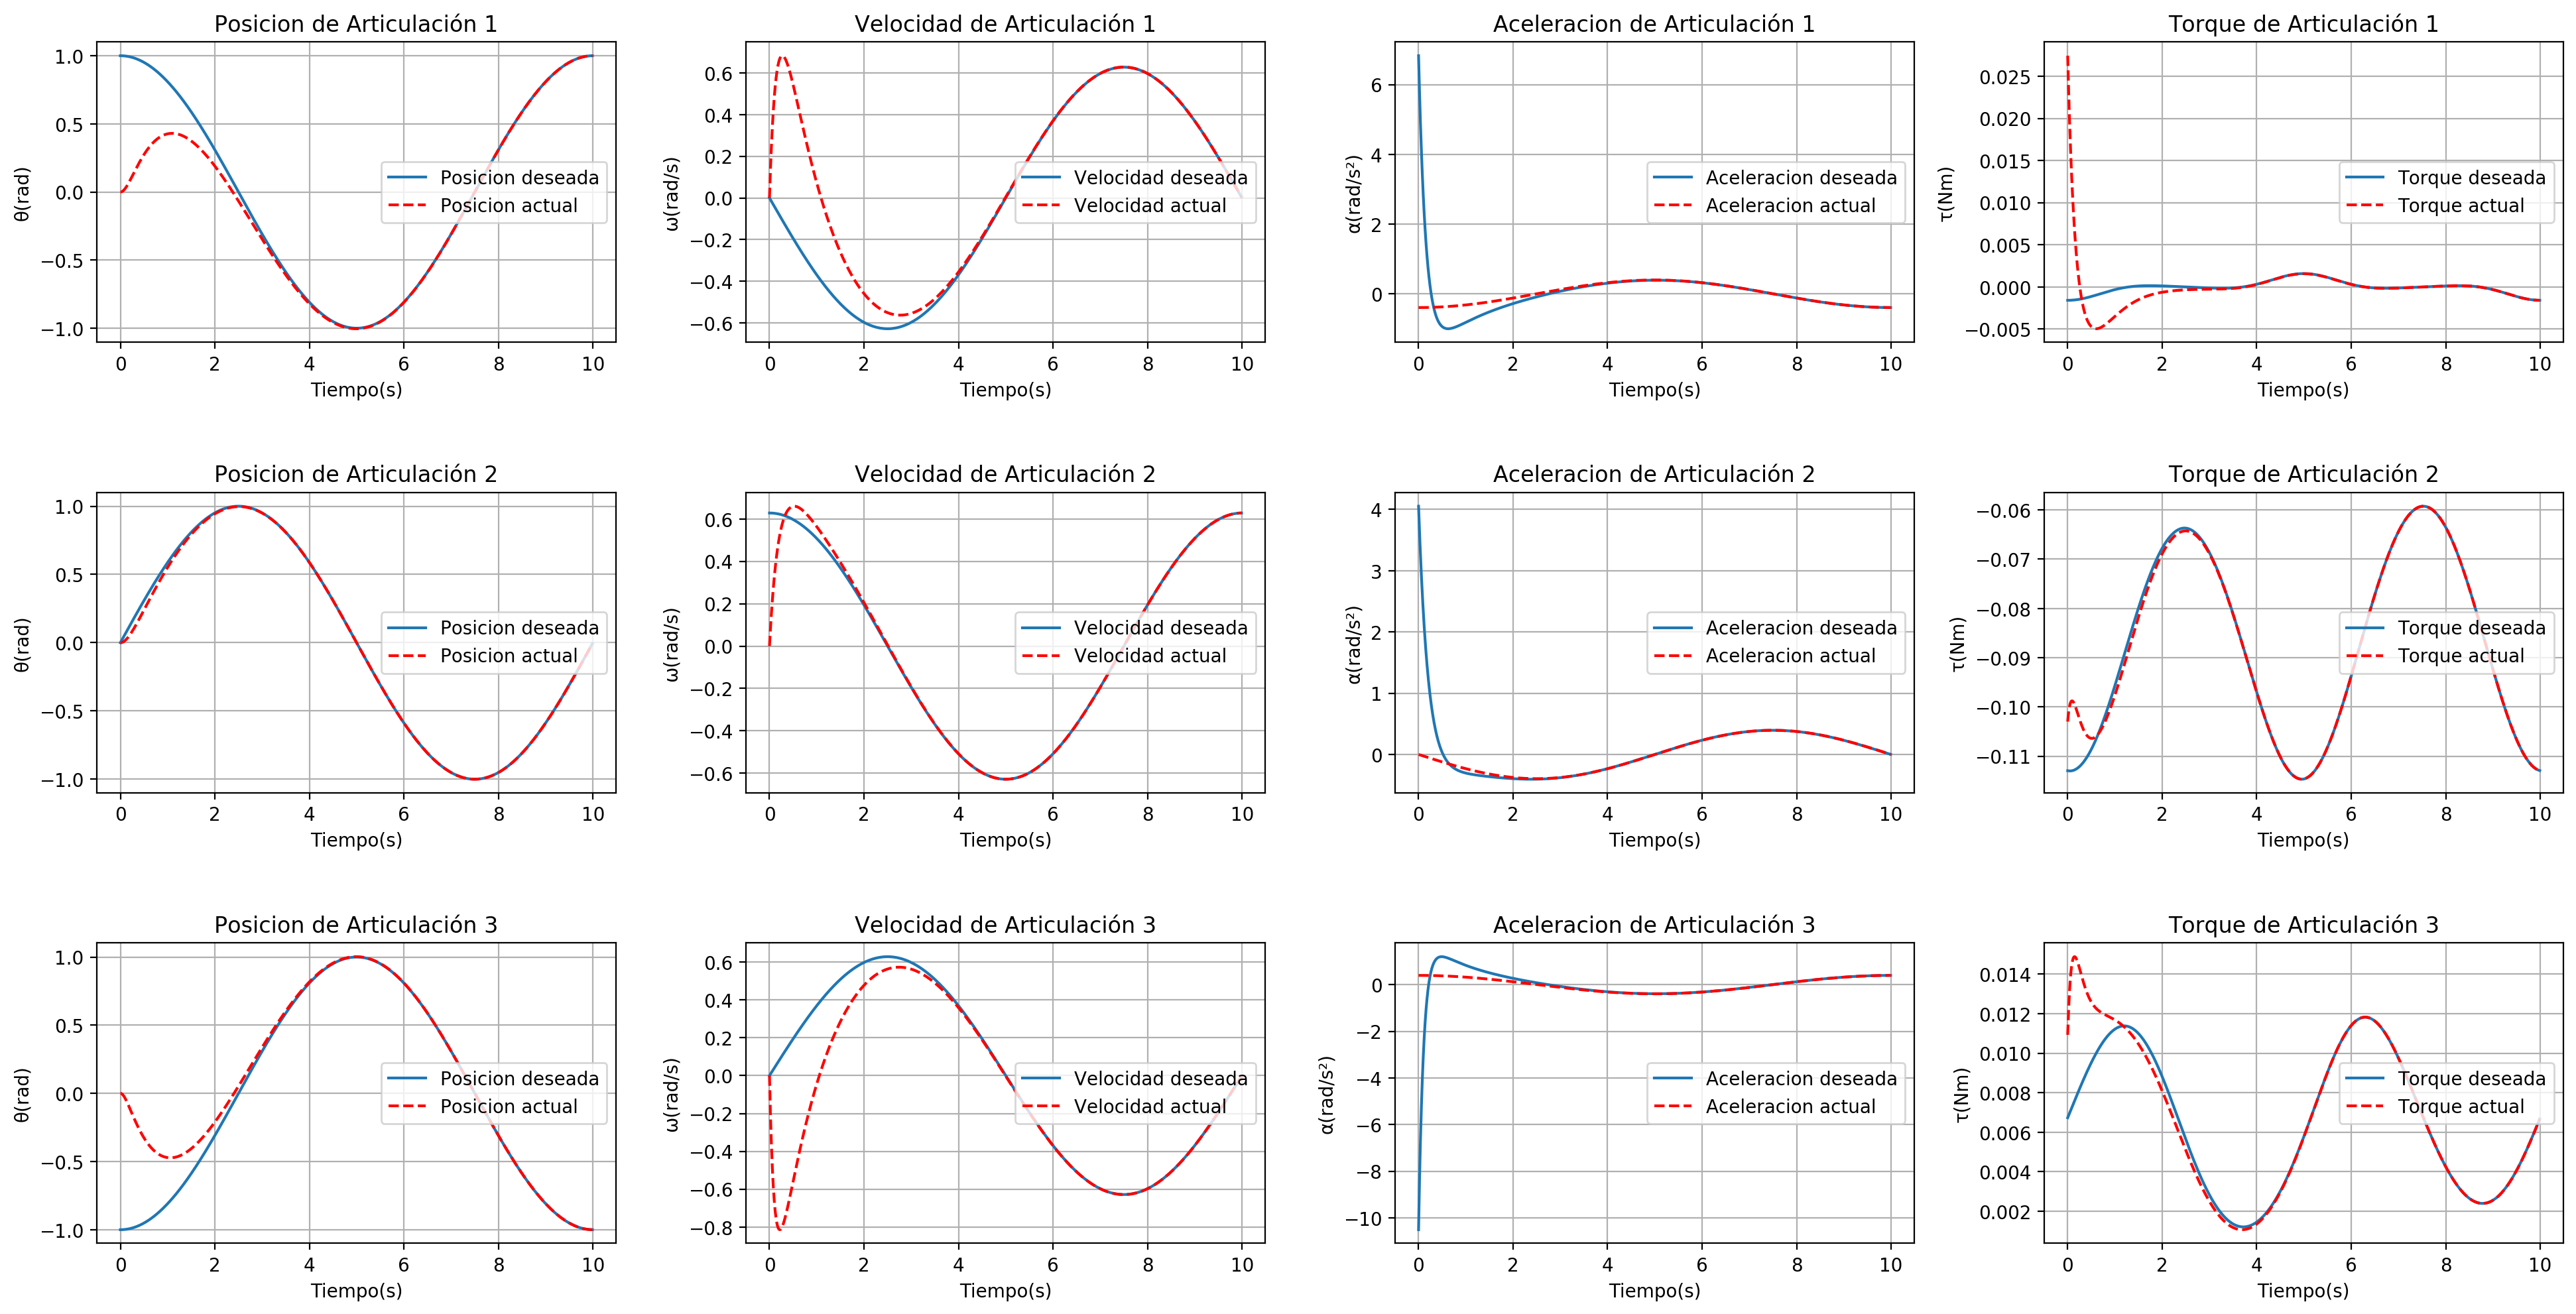

In [12]:
graficarTODO(Robot1,t,arregloValores)

## Graficar los errores de las articulaciones

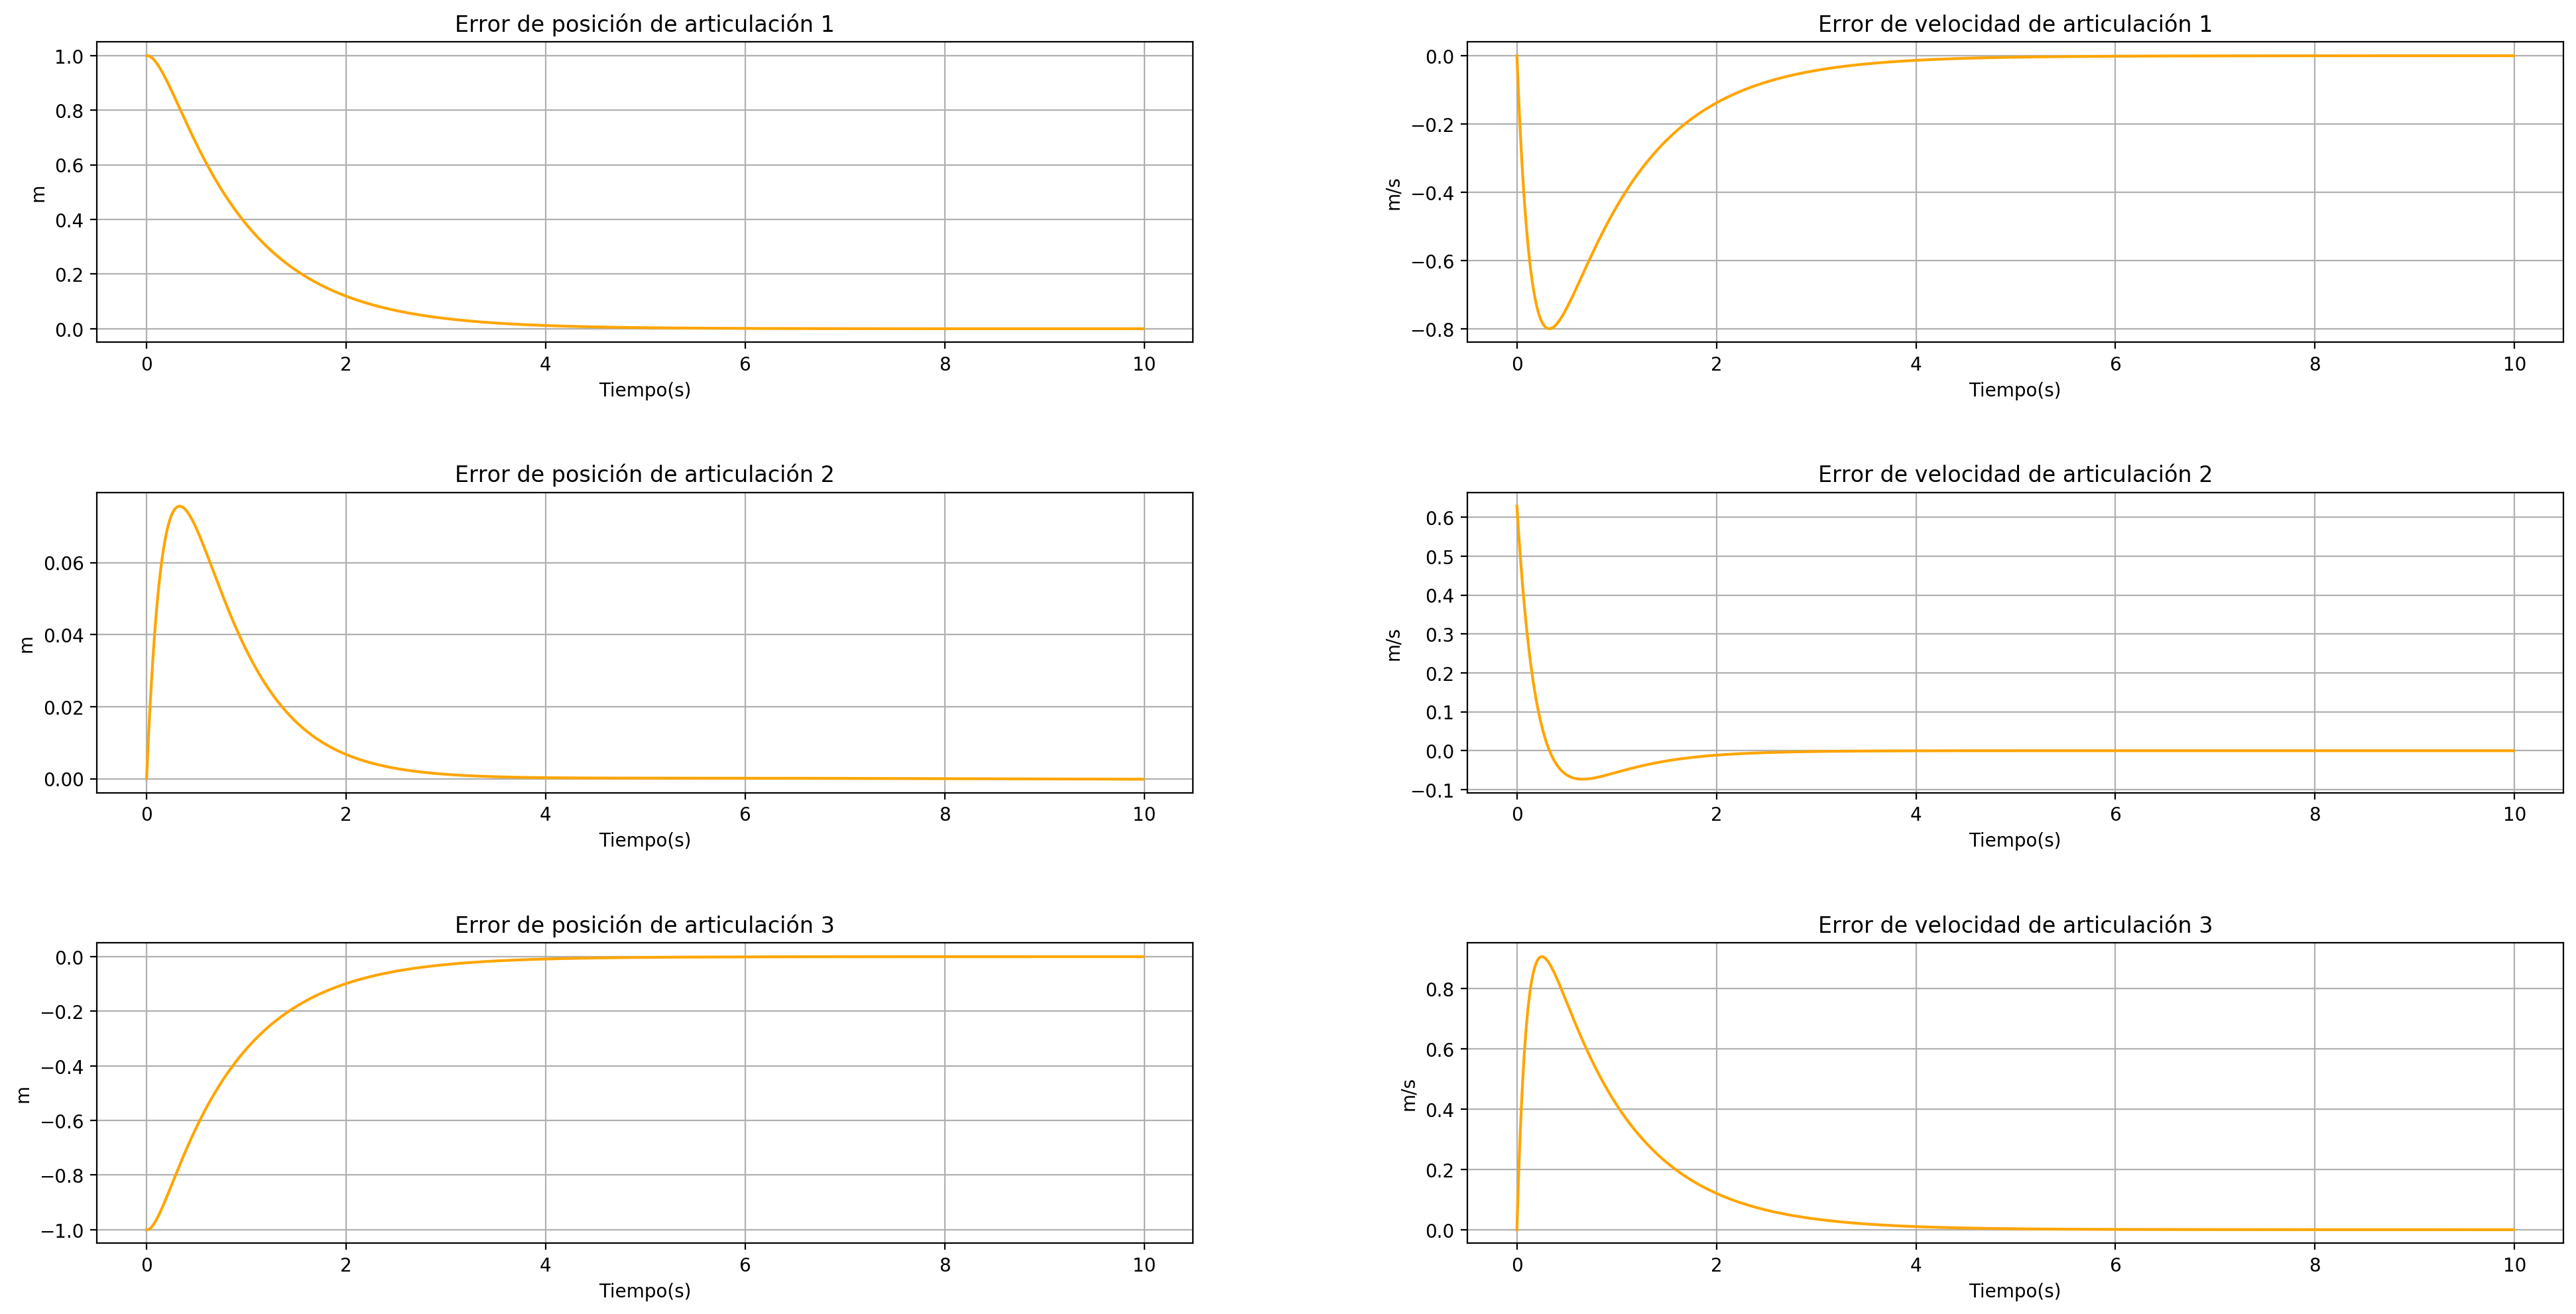

In [13]:
arregloErrores = [Ep,Ev]
graficarErrores(t,arregloErrores)

### Obtener la posición,velocidad y aceleración del efector final

In [14]:
P0e,V0e,A0e = generarTrayectoriaEspacioCartesiano(Robot1,Q,Qd,Qdd)

## Graficar los valores cinematicos del efector final

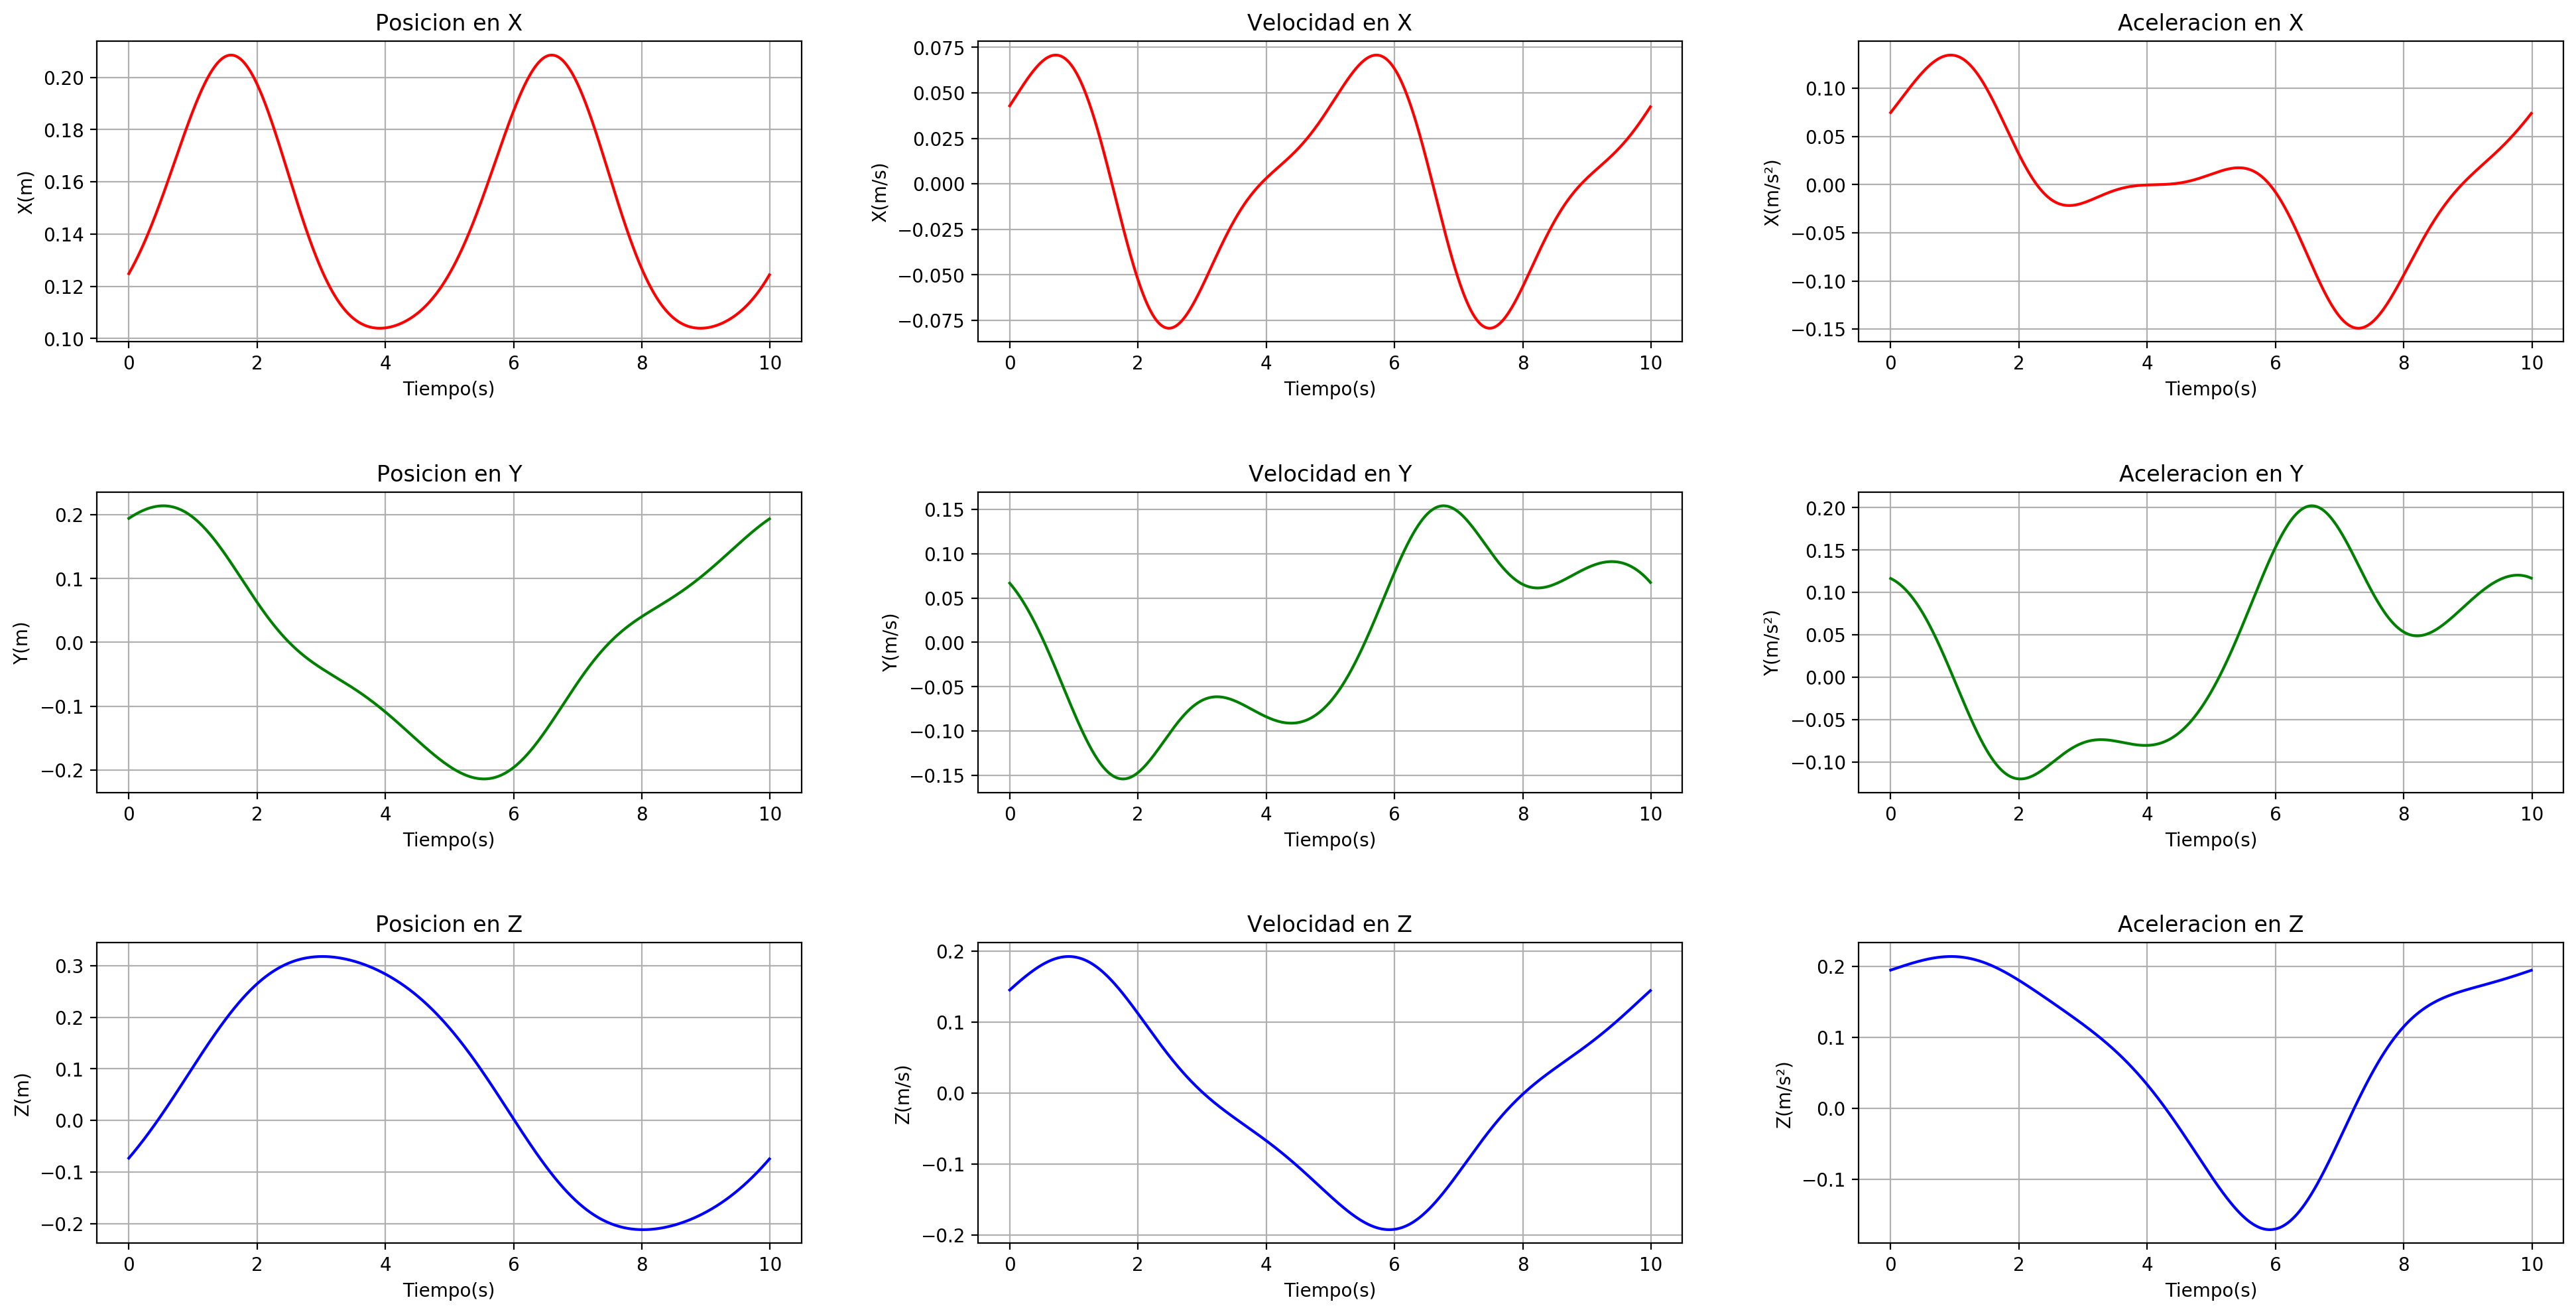

In [15]:
arregloValores = [P0e,V0e,A0e]
graficarTODO(Robot1,t,arregloValores,trayectoriasArticulares = False)

## Guardar las trayectorias de la posicion en un archivo .txt

In [16]:
data_file = open("trayArticulares.txt","w")
for tiempo in range(Q.shape[1]):
    for articulacion in range(Robot1.n):
        data_file.write(str(Q[articulacion,tiempo]) + "\t")
    data_file.write("\n")
data_file.close()

# FIN